### **EDA II | 2026 - 1 | Grupo 4  | Práctica 2**
# **Algoritmos de ordenamiento. Parte 2**

Gonzalez Barragan Abraham Elienai
## **Heap Sort**
### **Algoritmo** (y polinomios):

In [16]:
import random
import matplotlib.pyplot as plt
MAX = 1000

In [17]:
def heapify(arr, n, i):                         # log_2(n/2)
    largest = i                                 # log_2(n/2)*3
    left = 2 * i + 1                            # log_2(n/2)*7
    right = 2 * i + 2                           # log_2(n/2)*6
    if left < n and arr[left] > arr[largest]:   # log_2(n/2)*9
        largest = left                          # log_2(n/2)*3
    if right < n and arr[right] > arr[largest]: # log_2(n/2)*9
        largest = right                         # log_2(n/2)*3
    if largest != i:                            # log_2(n/2)*4
        temp = arr[i]                           # log_2(n/2)*4
        arr[i] = arr[largest]                   # log_2(n/2)*5
        arr[largest] = temp                     # log_2(n/2)*4
        heapify(arr, n, largest)                # log_2(n/2)*(log_2(n/2)+3)
                                                # (log_2(n/2))^2+61⋅log_2(n/2)

def heap_sort(arr):
    n = len(arr)                                # 4
    i = n // 2 - 1                              # 7
    while i >= 0:                               # (n-1)*6
        heapify(arr, n, i)                      # n*(((log_2(n/2))^2+61⋅log_2(n/2))+3)
        i -= 1                                  # n*5
    i = n - 1                                   # 5
    while i > 0:                                # (n-1)*4
        temp = arr[0]                           # n*4
        arr[0] = arr[i]                         # n*5
        arr[i] = temp                           # n*4
        heapify(arr, i, 0)                      # n*(((log_2(n/2))^2+61⋅log_2(n/2))+3)
        i -= 1                                  # n*5
                                                # Mejor, Peor y Caso Promedio:
                                                # 122nlog2(n/2)+(2n(log2(n/2))^2)+39n+6
arr = []
for i in range(MAX):
    arr.append(random.randint(-1000, 1000))

print(arr)
heap_sort(arr)
print(arr)

[-60, -965, -536, -810, -711, 353, -696, 642, -998, 394, 803, -452, -251, 931, -601, -297, -75, 2, -518, 862, -392, 394, 491, -755, -141, 949, 901, -488, 529, -592, 188, -835, 106, -688, 502, 694, -784, -97, 859, -715, 917, -802, 690, -696, 849, 511, 419, 617, -681, 201, 425, 142, 19, -657, -251, 579, -981, -229, -339, 810, 773, 813, -516, 689, 763, -913, 460, -518, 387, 460, -825, 293, -486, 860, 988, 76, 999, 612, 409, 874, -642, -561, 352, -860, -64, -559, 946, 431, -646, 973, 288, 894, 427, 131, 967, 828, -55, -183, 574, 260, -952, 688, -572, 237, -420, -133, 519, -258, 887, -649, 183, 449, -126, -666, -449, -969, 444, 891, 568, -811, -15, 841, -471, -145, 792, 671, -445, -384, -149, 173, 726, 570, 87, 27, -274, 521, -273, 88, 511, 747, -267, 769, 387, -305, 507, 638, -749, 165, -483, 93, 100, 134, 457, 763, 976, 554, 583, 863, 916, 518, 477, 370, -615, -674, -524, 933, 300, -103, 530, 5, 311, -96, 216, 639, 528, -466, 697, -488, 230, 420, -765, 314, -728, -445, -656, 917, 546, -93

### **Algortimo** (Gráfica):

In [18]:
def heap_sort_g(arr):
    times = 0
    n = len(arr)
    i = n // 2 - 1
    while i >= 0:
        times += 1 + heapify_g(arr, n, i)
        i -= 1
    i = n - 1
    while i > 0:
        temp = arr[0]
        arr[0] = arr[i]
        arr[i] = temp
        times += 1 + heapify_g(arr, i, 0)
        i -= 1
    return times

def heapify_g(arr, n, i):
    times = 0
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right
    if largest != i:
        temp = arr[i]
        arr[i] = arr[largest]
        arr[largest] = temp
        times += 1 + heapify_g(arr, n, largest)
    return times

## **Mejor Caso**

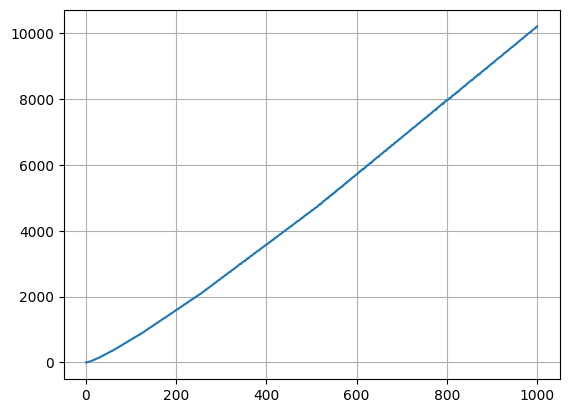

In [19]:
x = []
y = []
arr = []

for i in range(MAX):
    arr.append(i)
    y.append(heap_sort_g(arr))
    x.append(len(arr))

plt.plot(x, y)
plt.grid(True)
plt.show()

## **Peor Caso**

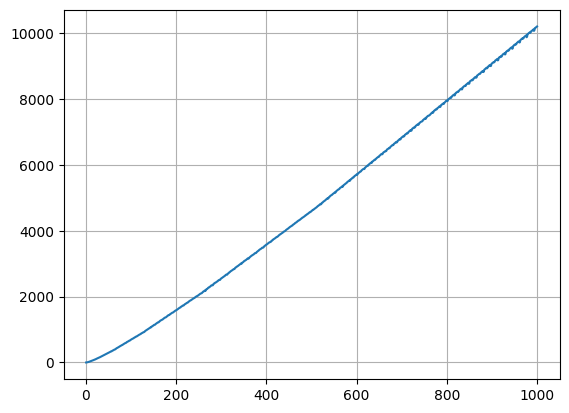

In [20]:
x = []
y = []
arr = []

for i in range(MAX):
    arr.append(MAX - i)
    y.append(heap_sort_g(arr))
    x.append(len(arr))

plt.plot(x, y)
plt.grid(True)
plt.show()

## **Caso Promedio**

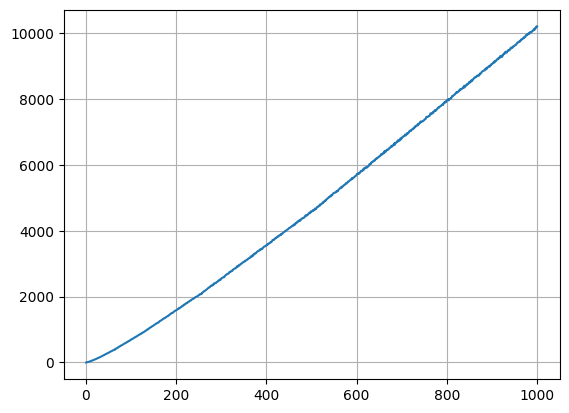

In [21]:
x = []
y = []
arr = []

for i in range(MAX):
    arr.append(random.randint(-1000, 1000))
    y.append(heap_sort_g(arr))
    x.append(len(arr))

plt.plot(x, y)
plt.grid(True)
plt.show()

## **Quick Sort**
### **Algortimo** (Polinomios):

In [22]:
def quick_sort_exe(arr, p):
    quick_sort(arr, 0, len(arr) - 1, p)

def quick_sort(arr, low, high, p):                  # log2(n)                  = log2(n)
    if low < high:                                  # log2(n)*4                = 4log2(n)
        if p == 1:                                  # log2(n)*4                = 4log2(n)
            pivot = arr[(low + high) // 2]          # log2(n)*8                = 8log2(n)
        else:                                       # log2(n)*1                = log2(n)
            pivot = arr[low]                        # log2(n)*4                = 4log2(n)
        i = low - 1                                 # log2(n)*5                = 5log2(n)
        j = high + 1                                # log2(n)*5                = 5log2(n)
        while i < j:                                # log2(n)*n                = nlog2(n)
            i += 1                                  # log2(n)*n*5              = 5nlog2(n)
            while arr[i] < pivot:                   # log2(n)*n*n/2-1*5        = 5(n^2)*log2(n)       <- log2(n)*n*(n-1-1)*5    <- 0         <- (5(n^2)*log2(n))/2
                i += 1                              # log2(n)*n*n/2*5          = (n^2)/10*log2(n)     <- log2(n)*n*(n-1-1)*5    <- 0         <- (n^2)/20*log2(n)
            j -= 1                                  # log2(n)*n*5              = 5nlog2(n)
            while arr[j] > pivot:                   # log2(n)*n*n/2-1*5        = 5(n^2)*log2(n)       <- log2(n)*n*(n-1-1)*5    <- 0         <- (5(n^2)*log2(n))/2
                j -= 1                              # log2(n)*n*n/2*5          = (n^2)/10*log2(n)     <- log2(n)*n*(n-1-1)*5    <- 0         <- (n^2)/20*log2(n)
            if i < j:                               # log2(n)*n*4              = 4nlog2(n)
                temp = arr[i]                       # log2(n)*n*4              = 4nlog2(n)
                arr[i] = arr[j]                     # log2(n)*n*5              = 5nlog2(n)
                arr[j] = temp                       # log2(n)*n*4              = 4nlog2(n)
        pivot_index = j                             # log2(n)*n*3              = 3log2(n)
        quick_sort(arr, low, pivot_index, p)        # log2(n)*(log2(n/2)+4)   = (log2(n))(log2(n/2)) + 4log2(n)
        quick_sort(arr, pivot_index + 1, high, p)   # log2(n)*(log2(n/2)+4)   = (log2(n))(log2(n/2)) + 4log2(n)
                                                    #                                                Peor Caso: 5n^2log2(n) + 17nlog2(n) + (log2(n))^2
                                                    #                                                                        Mejor Caso: 28nlog2(n) + 2(log2(n))^2 + 49*log2(n)
                                                    #                                                                                     Caso Promedio: (51n/10)^2log2(n) + 28nlog2(n) + 2(log2(n))^2 + 49log2(n)
arr = []
for i in range(MAX):
    arr.append(random.randint(-1000, 1000))

print(arr)
quick_sort_exe(arr, 1)
print(arr)


[679, -543, -441, 184, 998, -386, 942, -986, 731, -877, -775, 560, -235, 414, 386, 671, 145, -30, 292, 326, -657, 270, 806, -833, 497, 932, -487, 401, -835, 800, -251, -899, -456, 39, -783, 961, 517, 695, 278, 290, 243, 887, -200, 958, 209, -525, 608, 409, 80, 438, -725, 211, -725, -745, -72, -909, 642, 621, 148, 963, 657, -160, 964, -880, 99, -414, -155, -547, 778, 648, 188, 883, 661, 389, -195, 291, -113, -907, -81, 53, 406, -245, -678, -287, 394, -914, 150, -881, 751, -300, 801, 17, -859, -37, 760, -391, 287, -633, 916, -711, 686, 53, -65, -494, -891, 744, -154, -561, 839, -981, 497, 619, -162, -51, -556, -993, -271, -144, 254, -299, 536, 126, -252, 925, 302, -372, 864, 899, 809, 287, -102, -409, -212, -385, 392, 264, -444, -734, -665, -350, 540, -341, -230, -589, 526, 471, -646, 563, 661, -702, -699, 506, -909, -663, -694, -188, -941, -998, 21, -49, 632, -553, -996, -540, -250, -691, -501, 551, -951, 272, 672, 325, 71, -811, 531, -35, -722, 923, -268, 892, 996, -899, -131, -309, 18

### **Algortimo** (Gráfica):

In [23]:
def quick_sort_exe_g(arr, p):
    return quick_sort_g(arr, 0, len(arr) - 1, p, 0)

def quick_sort_g(arr, low, high, p, times):
    if low < high:
        if p == 1:
            pivot = arr[(low + high) // 2]
        else:
            pivot = arr[low]
        i = low - 1
        j = high + 1
        while i < j:
            i += 1
            while arr[i] < pivot:
                i += 1
                times += 1
            j -= 1
            while arr[j] > pivot:
                j -= 1
                times += 1
            if i < j:
                temp = arr[i]
                arr[i] = arr[j]
                arr[j] = temp
            times += 1

        pivot_index = j
        
        times = quick_sort_g(arr, low, pivot_index, p, times)
        times = quick_sort_g(arr, pivot_index + 1, high, p, times)

    return times

arr = []
for i in range(MAX):
    arr.append(random.randint(-1000, 1000))

print(arr)
quick_sort_exe_g(arr, 1)
print(arr)


[-850, -804, -196, 572, -178, 379, 678, 941, -896, 565, 386, -326, 528, 964, 588, 459, 787, 429, -367, -78, -390, -861, 854, 983, -496, 412, 496, -375, 993, -870, -205, 410, 556, 977, -286, 285, 731, -959, -842, 980, 532, -556, -831, -446, 382, -737, 216, -210, -687, 857, 825, 106, -989, 648, 814, -574, -433, 388, 538, 164, 763, 28, 609, 74, -819, 33, 343, 979, -453, -47, 693, -30, -499, 877, 972, -583, 780, -556, 852, -375, 94, -423, -304, 554, 752, 667, -543, 830, 789, 442, -243, 858, -16, -408, 759, 595, 153, 516, -418, 676, 154, -547, -816, 745, 843, 717, 541, 305, -84, -753, -217, -62, -405, 769, 293, 913, -872, 385, -547, -622, 425, -363, 637, 80, 891, -407, 390, 89, 256, -765, 656, 170, -746, 174, -890, -242, -867, 91, -331, -432, 61, 246, -514, 197, -134, 286, -564, -898, -811, 806, 416, -434, -103, -699, -169, -187, 48, -366, 469, -279, 935, 7, 535, -786, -731, 721, -613, -726, 985, -917, -235, 642, -582, -248, 718, 941, -422, -431, -197, -502, -361, -818, 996, -352, -387, -20

## **Mejor Caso**

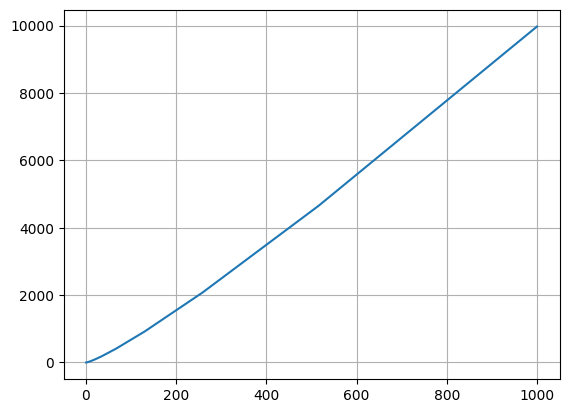

In [24]:
x = []
y = []
arr = []

for i in range(MAX):
    arr.append(i)
    y.append(quick_sort_exe_g(arr, 1))
    x.append(len(arr))

plt.plot(x, y)
plt.grid(True)
plt.show()

## **Peor Caso**

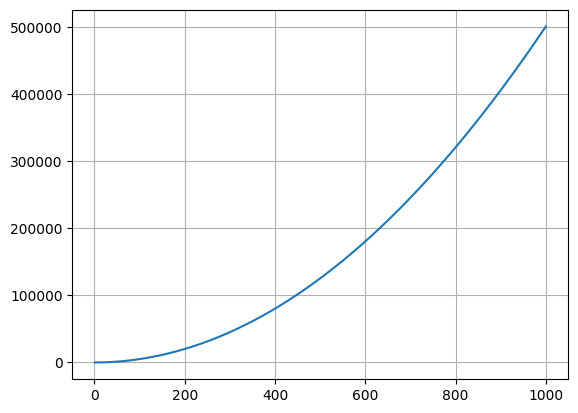

In [25]:
x = []
y = []
arr = []

for i in range(MAX):
    arr.append(i)
    y.append(quick_sort_exe_g(arr, 0))
    x.append(len(arr))

plt.plot(x, y)
plt.grid(True)
plt.show()

## **Caso Promedio**

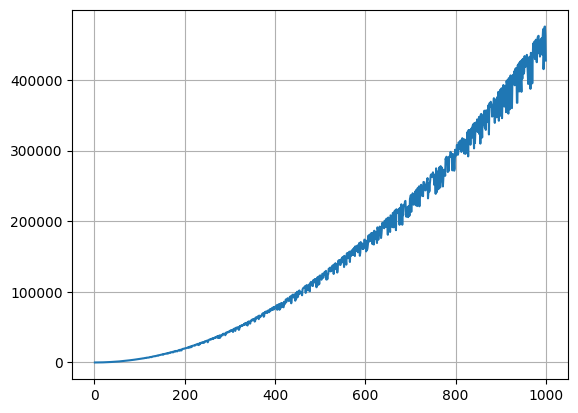

In [26]:
x = []
y = []
arr = []

for i in range(MAX):
    arr.append(random.randint(-1000, 1000))
    y.append(quick_sort_exe_g(arr, 0))
    x.append(len(arr))

plt.plot(x, y)
plt.grid(True)
plt.show()